In [149]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline()
            seq = fh.readline().rstrip()
            fh.readline()
            qual = fh.readline().rstrip()
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

In [150]:
seqs, quals =readFastq("SRR835775_1.first1000.fastq")

In [169]:
quals[3]

'@CCFFDDFHHHDFHIJJCGGIJJHIIHJC?DHHIJ0?DGHI9BBFHICGGIGI=CDEGI=?AAEF7@?################################'

In [161]:
def phred33ToQ(qual):
    return ord(qual) - 33

In [168]:
phred33ToQ("A")

32

In [152]:
def createHist(qualities):
    hist=[0]*50
   
    for qual in qualities:
        for phred in qual:
            q = phred33ToQ(phred)
            hist[q] += 1
    return hist

In [153]:
hist = createHist(quals)

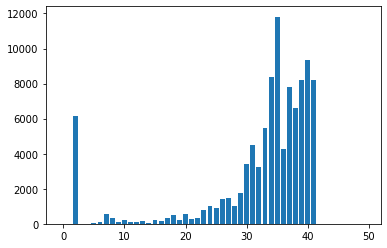

In [154]:
import matplotlib.pyplot as plt
plt.bar(range(len(hist)),hist)
plt.show()


In [139]:
def findGCByPos(reads):
    gc = [0]*len(reads[0])
    totals = [0]*len(reads[0])
    
    for read in reads:
        for i in range(len(read)):
            if read[i] == "C" or read[i] == "G":
                gc[i] += 1
            totals[i] += 1
            
    gc = [cantgoc, ]
    for i in range (len(gc)):
        if(totals[i]>0):
            gc[i]/= float(totals[i])
   
    
    return gc


In [157]:
#NOTE: Do not use this function. It was experimental

def findGCByPos2(reads):
    gc = [0]*1000
    totals = [0]*1000
    
    for i,line in enumerate(reads):
        gcs = 0
        total = 0
        for base in range(len(line)):
            if line[base] == "G" or line[base] == "C":
                gcs += 1
            total+=1
        gc[i] = gcs
        totals[i] = total
    
    for per in range(len(gc)):
        gc[per] /= totals[per]
    return gc
            

In [158]:
gc = findGCByPos2(seqs)



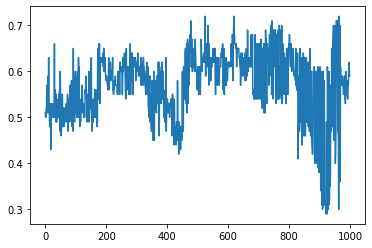

In [159]:
plt.plot(range(len(gc)),gc)

In [148]:
import collections
count = collections.Counter()
for seq in seqs:    
    count.update(seq)
count #N = No confidence

Counter({'T': 21836, 'A': 21132, 'C': 28272, 'G': 28742, 'N': 18})